In [1]:
#LOADS LIBRARIES
import os
import sys
import warnings
warnings.simplefilter('ignore')
import pickle
#import dill as pickle

import numpy as np
import pandas as pd
import math

import time 
import datetime
from dateutil.relativedelta import relativedelta

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
#sns.set()
#sns.reset_orig
#matplotlib.rc_file_defaults()

In [3]:
#Defines directories

INPUT_DIR = r'C:\Users\willi\Documents\EJERCICIOS\OPI\ '.strip()

OUTPUT_DIR = r'C:\Users\willi\Documents\EJERCICIOS\OPI\outputs'.strip()

In [4]:
#Call the investigation data frame

df_invest = pd.read_pickle(OUTPUT_DIR + 'df_invest_s1.pkl')

print(df_invest.shape)
print('\n')

for c in df_invest.columns.tolist():
    print(c)

(1168250, 19)


ao_hechos
mes_hechos
ao_inicio
mes_inicio
delito
fiscalia
agencia
unidad_investigacion
categoria_delito
alcaldia_hechos
competencia
fecha_hechos
fecha_inicio
calle_hechos
calle_hechos2
colonia_hechos
_id
longitud
latitud


In [10]:
print(df_invest['fiscalia'].value_counts(dropna=False).reset_index().sort_values(['fiscalia']))

                                                index  fiscalia
73  FISCALÃA DE INVESTIGACIÃN Y PERSECUCIÃN DE ...         1
72                                                NAN         2
71  FISCALÃA ESPECIALIZADA PARA LA ATENCIÃN DE D...         6
70                       FISCALIA DELITOS ELECTORALES        12
68  ESPECIALIZADA EN LA BÃSQUEDA, LOCALIZACIÃN E...        43
..                                                ...       ...
4                  INVESTIGACIÃN EN ÃLVARO OBREGÃN     54129
3                    INVESTIGACIÃN EN BENITO JUÃREZ     74528
2                 INVESTIGACIÃN EN GUSTAVO A. MADERO     78355
1                        INVESTIGACIÃN EN CUAUHTEMOC    114405
0                        INVESTIGACIÃN EN IZTAPALAPA    114947

[74 rows x 2 columns]


# Identifica los delitos que van a la alza y a la baja en la CDMX (ten cuidado con los delitos con pocas ocurrencias).

In [6]:
print(df_invest['ao_inicio'].value_counts(dropna=False).reset_index().sort_values(['index']))
print(df_invest['mes_inicio'].value_counts(dropna=False).reset_index().sort_values(['index']))

  index  ao_inicio
4  2016     197913
2  2017     228323
0  2018     255311
1  2019     250386
3  2020     204036
5  2021      32281
         index  mes_inicio
11       ABRIL       88170
4       AGOSTO       98721
8    DICIEMBRE       92344
1        ENERO      108088
0      FEBRERO      108490
7        JULIO       94483
10       JUNIO       91212
3        MARZO       99020
9         MAYO       92287
5    NOVIEMBRE       96344
2      OCTUBRE      103727
6   SEPTIEMBRE       95364


In [11]:
#fIxes the month to number

df_invest['mes_inicio2'] = 0
df_invest.loc[df_invest['mes_inicio'].isin(['ENERO']), 'mes_inicio2'] = '01'
df_invest.loc[df_invest['mes_inicio'].isin(['FEBRERO']), 'mes_inicio2'] = '02'
df_invest.loc[df_invest['mes_inicio'].isin(['MARZO']), 'mes_inicio2'] = '03'
df_invest.loc[df_invest['mes_inicio'].isin(['ABRIL']), 'mes_inicio2'] = '04'
df_invest.loc[df_invest['mes_inicio'].isin(['MAYO']), 'mes_inicio2'] = '05'
df_invest.loc[df_invest['mes_inicio'].isin(['JUNIO']), 'mes_inicio2'] = '06'
df_invest.loc[df_invest['mes_inicio'].isin(['JULIO']), 'mes_inicio2'] = '07'
df_invest.loc[df_invest['mes_inicio'].isin(['AGOSTO']), 'mes_inicio2'] = '08'
df_invest.loc[df_invest['mes_inicio'].isin(['SEPTIEMBRE']), 'mes_inicio2'] = '09'
df_invest.loc[df_invest['mes_inicio'].isin(['OCTUBRE']), 'mes_inicio2'] = '10'
df_invest.loc[df_invest['mes_inicio'].isin(['NOVIEMBRE']), 'mes_inicio2'] = '11'
df_invest.loc[df_invest['mes_inicio'].isin(['DICIEMBRE']), 'mes_inicio2'] = '12'

print(df_invest['mes_inicio2'].value_counts(dropna=False).reset_index().sort_values(['index']))


   index  mes_inicio2
1     01       108088
0     02       108490
3     03        99020
11    04        88170
9     05        92287
10    06        91212
7     07        94483
4     08        98721
6     09        95364
2     10       103727
5     11        96344
8     12        92344


In [27]:
#Creates year-month identification

df_invest['anomes_inicio'] = df_invest['ao_inicio'] + '-' + df_invest['mes_inicio2']

print(df_invest['anomes_inicio'].value_counts(dropna=False).reset_index().sort_values(['index']))

      index  anomes_inicio
58  2016-01          14778
57  2016-02          15515
53  2016-03          16270
45  2016-04          16992
48  2016-05          16857
..      ...            ...
28  2020-10          19645
38  2020-11          17890
46  2020-12          16968
55  2021-01          15874
51  2021-02          16407

[62 rows x 2 columns]


In [14]:
#Pivots the coverages of offer

 

df_crimes_series = pd.pivot_table(df_invest,index=['categoria_delito'],columns=['anomes_inicio'],values='_id',aggfunc='count')

df_crimes_series = df_crimes_series.reset_index()


print(df_crimes_series.shape)
df_crimes_series

 

# ls_offers= df_ofertas_05b.columns.tolist()

# ls_offers = [x for x in ls_offers if 'certificateId' not in str(x)]

# ls_offers

 

# for t in ls_offers:

#     df_ofertas_05b = df_ofertas_05b.rename(columns={t:'cob_oferta_' + str(t)})

   

# df_ofertas_05b

anomes_inicio,categoria_delito,2016-01,2016-02,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08,2016-09,...,2020-05,2020-06,2020-07,2020-08,2020-09,2020-10,2020-11,2020-12,2021-01,2021-02
0,DELITO DE BAJO IMPACTO,11171.0,11917.0,12719.0,13201.0,13285.0,13094.0,12702.0,13419.0,13333.0,...,8923.0,11105.0,13578.0,14399.0,14591.0,16525.0,14863.0,13931.0,12968.0,13516.0
1,FEMINICIDIO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,HECHO NO DELICTIVO,1316.0,1249.0,1086.0,1375.0,1199.0,1017.0,929.0,1169.0,1172.0,...,296.0,314.0,294.0,286.0,278.0,336.0,305.0,289.0,340.0,369.0
3,HOMICIDIO DOLOSO,76.0,76.0,87.0,79.0,88.0,80.0,84.0,73.0,98.0,...,108.0,105.0,101.0,82.0,83.0,107.0,92.0,101.0,92.0,88.0
4,LESIONES DOLOSAS POR DISPARO DE ARMA DE FUEGO,113.0,96.0,121.0,121.0,113.0,123.0,147.0,143.0,143.0,...,91.0,81.0,90.0,94.0,82.0,83.0,65.0,89.0,70.0,73.0
5,PLAGIO O SECUESTRO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,ROBO A CASA HABITACIÃN CON VIOLENCIA,36.0,49.0,52.0,48.0,39.0,42.0,31.0,27.0,53.0,...,38.0,54.0,47.0,58.0,55.0,49.0,56.0,63.0,62.0,55.0
7,ROBO A CUENTAHABIENTE SALIENDO DEL CAJERO CON ...,37.0,37.0,37.0,26.0,41.0,26.0,18.0,25.0,38.0,...,17.0,17.0,28.0,30.0,20.0,33.0,25.0,46.0,31.0,34.0
8,ROBO A NEGOCIO CON VIOLENCIA,276.0,246.0,285.0,234.0,241.0,168.0,105.0,142.0,192.0,...,300.0,251.0,294.0,261.0,222.0,257.0,290.0,285.0,287.0,226.0
9,ROBO A PASAJERO A BORDO DE MICROBUS CON Y SIN ...,63.0,72.0,83.0,73.0,76.0,36.0,32.0,33.0,63.0,...,29.0,21.0,40.0,43.0,25.0,25.0,40.0,33.0,34.0,28.0


In [36]:
# Frequency for Total of crimes

df_cats = df_invest.groupby(['categoria_delito']).agg(
                        Frequency = ('_id','count'),
)

df_cats = df_cats.reset_index()
df_cats['pp_freq'] = (df_cats['Frequency']/sum(df_cats['Frequency']))*100
df_cats = df_cats.sort_values(['Frequency'],ascending=[False])
df_cats_01 = df_cats.copy()
df_cats_01

,categoria_delito,Frequency,pp_freq
0,DELITO DE BAJO IMPACTO,907430,77.674299
13,ROBO A TRANSEUNTE EN VÃA PÃBLICA CON Y SIN V...,67151,5.747999
15,ROBO DE VEHÃCULO CON Y SIN VIOLENCIA,63048,5.396790
2,HECHO NO DELICTIVO,55433,4.744960
8,ROBO A NEGOCIO CON VIOLENCIA,19566,1.674813
12,ROBO A REPARTIDOR CON Y SIN VIOLENCIA,12137,1.038904
11,ROBO A PASAJERO A BORDO DEL METRO CON Y SIN VI...,10907,0.933619
4,LESIONES DOLOSAS POR DISPARO DE ARMA DE FUEGO,8750,0.748984
3,HOMICIDIO DOLOSO,6784,0.580698
17,VIOLACIÃN,5840,0.499893


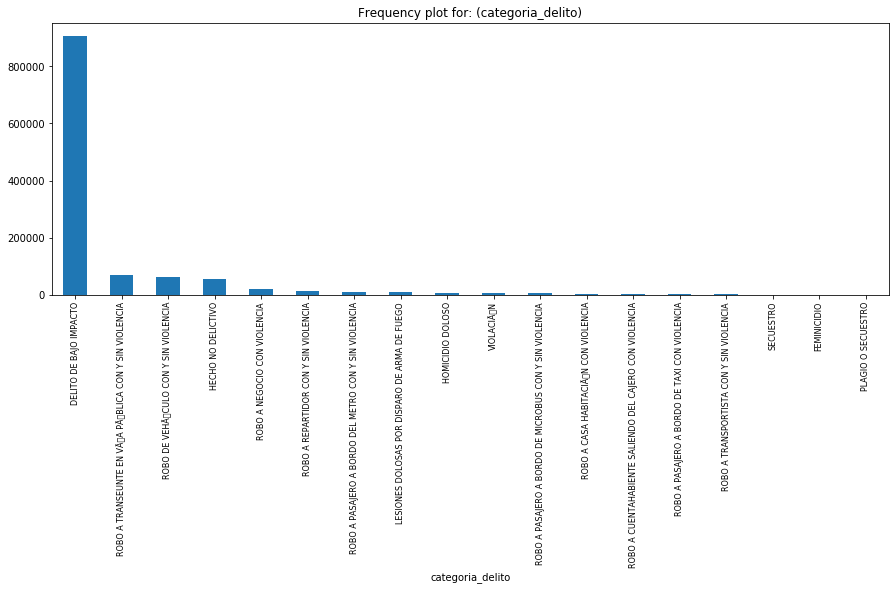

In [40]:
fig, axes = plt.subplots(1, 1, figsize=(15, 5))
grid = plt.GridSpec(2, 2, wspace=0.1, hspace=1.5)

df_cats_01.plot.bar(x='categoria_delito', y='Frequency', rot=0, legend=False, title="Frequency plot for: (categoria_delito)",ax=axes)
axes.tick_params(axis='x', labelsize=8 , rotation=90)

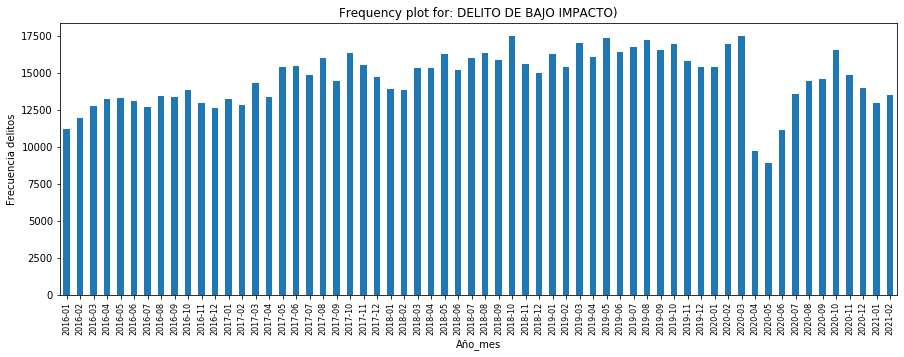

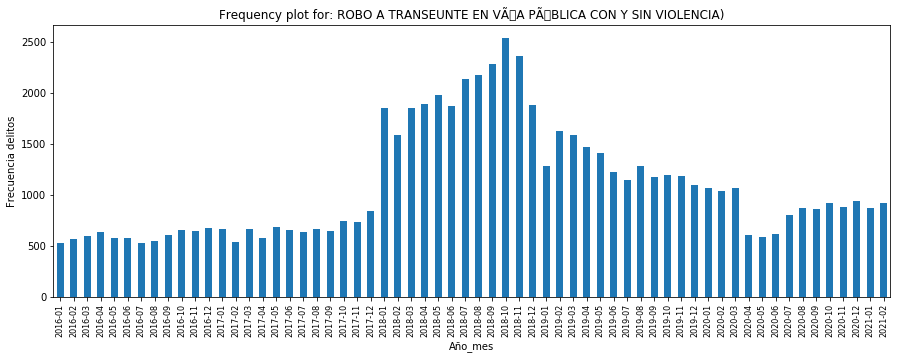

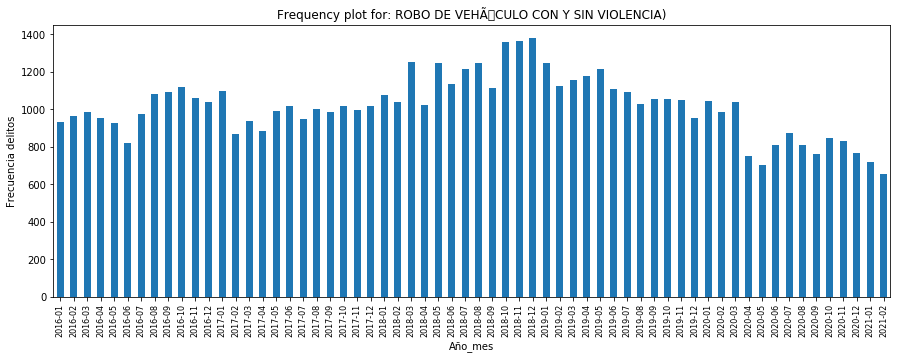

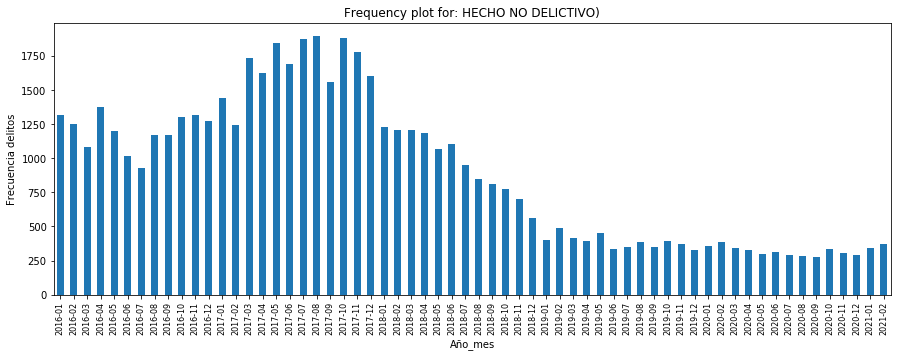

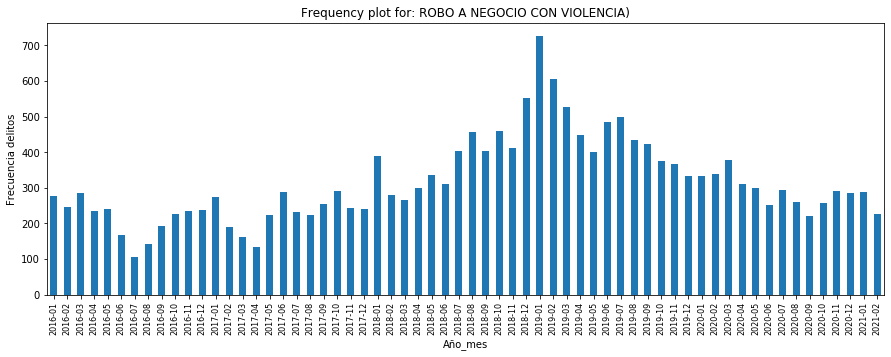

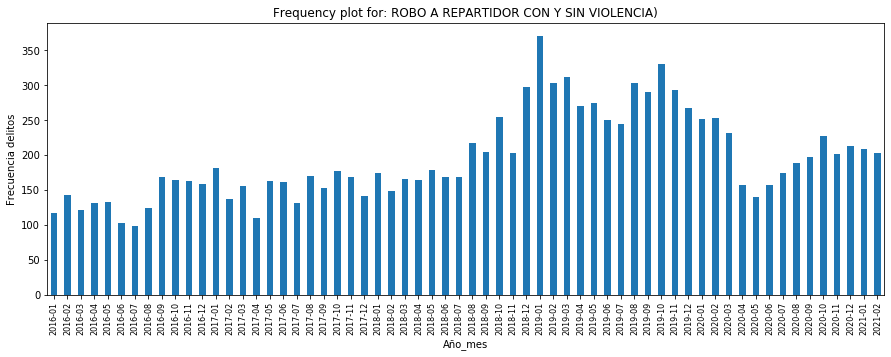

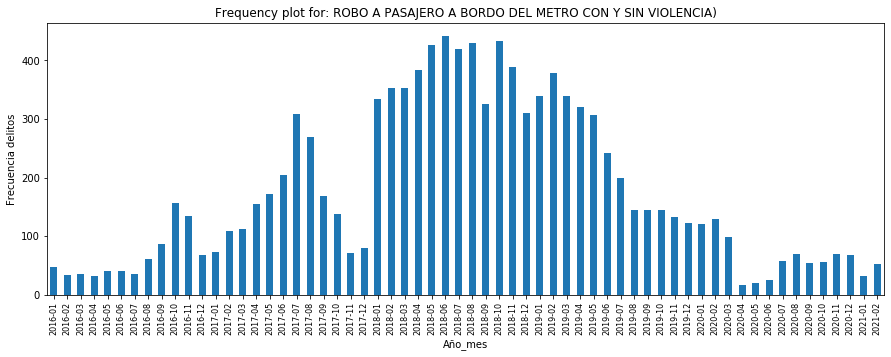

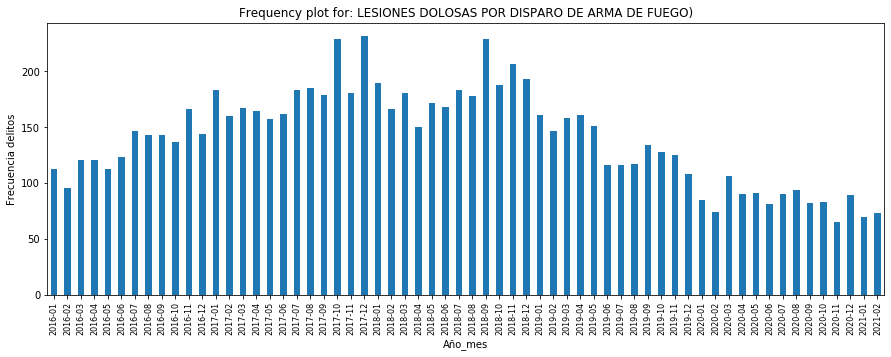

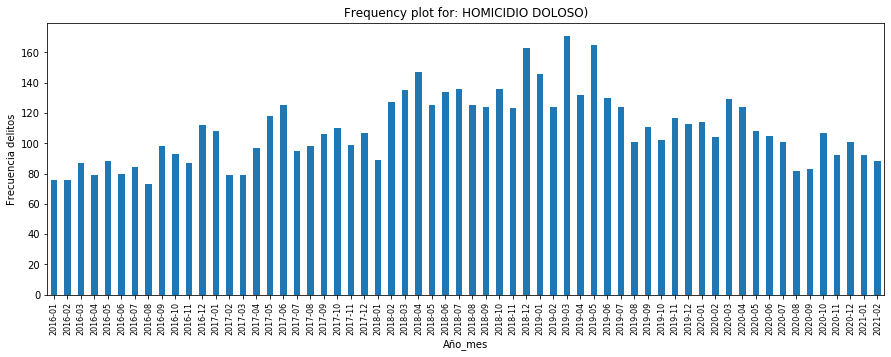

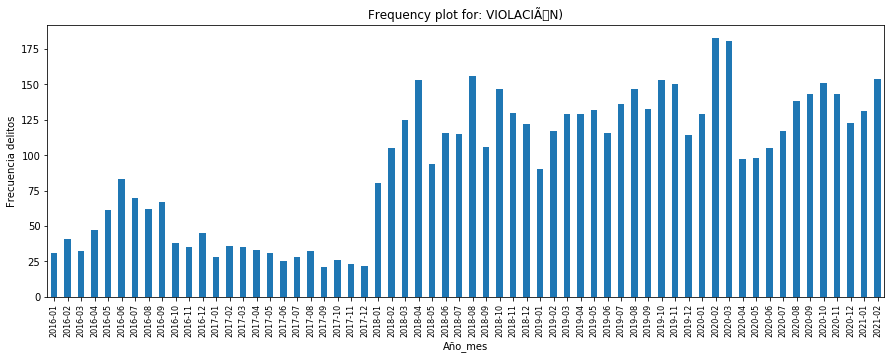

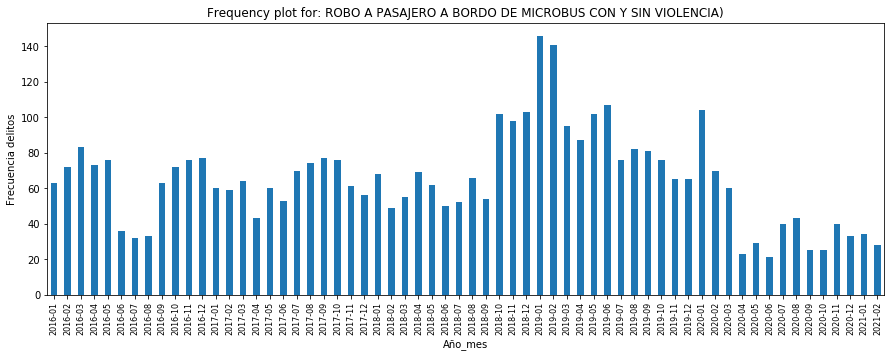

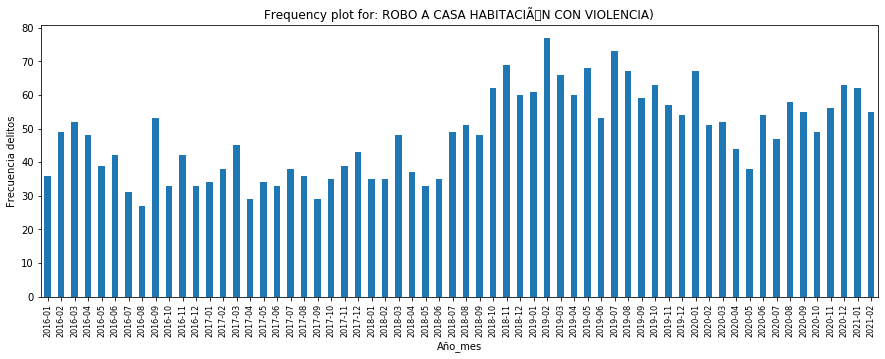

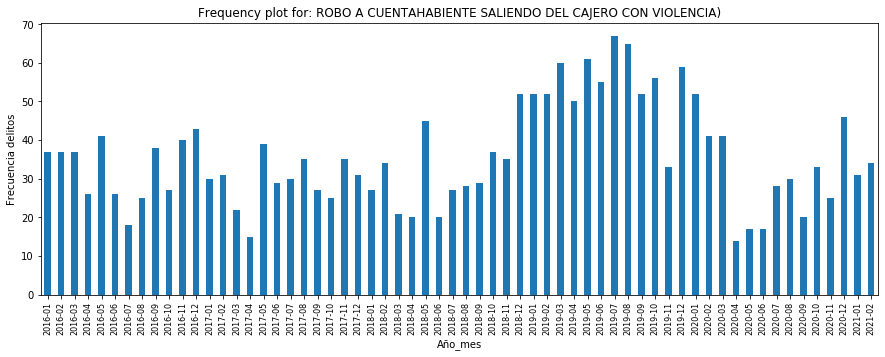

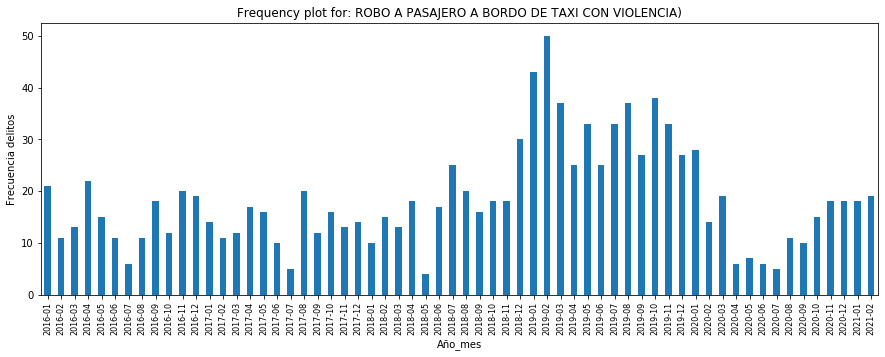

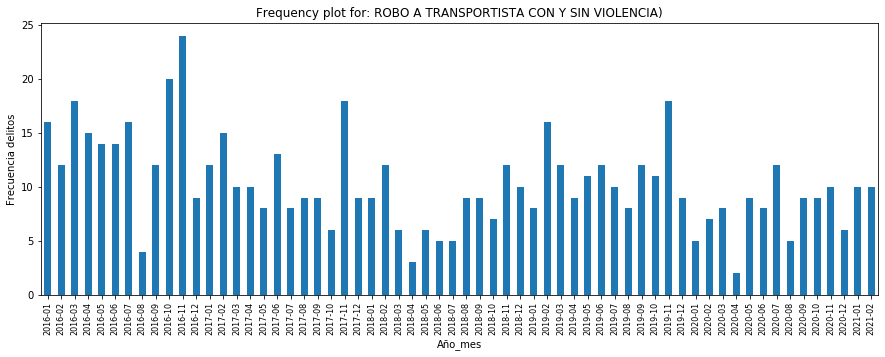

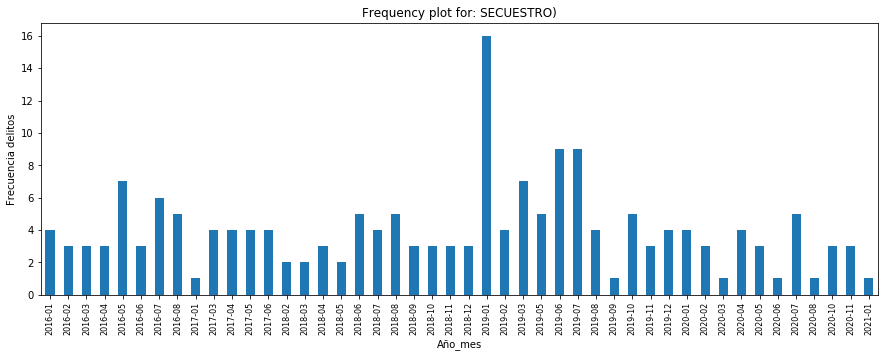

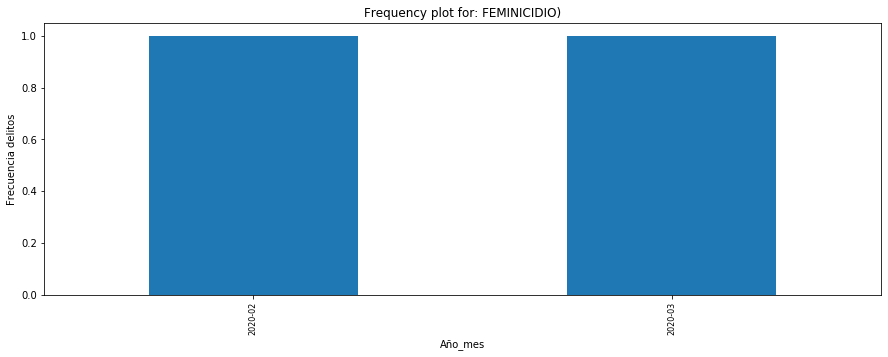

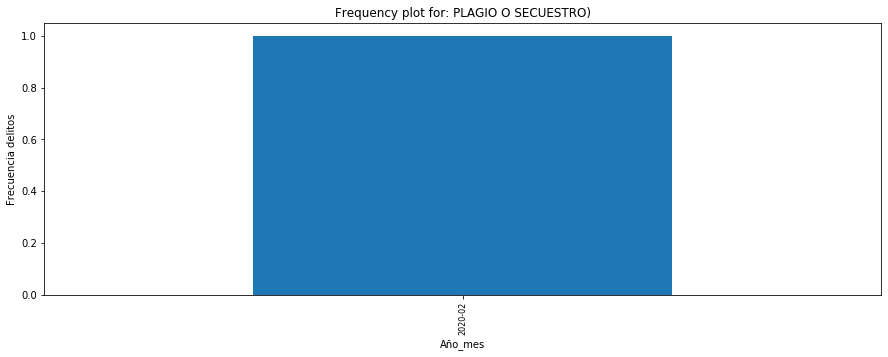

In [42]:
# Grafical visualization for temporal frequencies by type of crime

ls_cats = df_cats_01['categoria_delito'].tolist()

for c in ls_cats:
    
    df_invest_cat = df_invest[df_invest['categoria_delito'].isin([c])]
    
    
    df_cats = df_invest_cat.groupby(['anomes_inicio']).agg(
                        Frequency = ('_id','count'),
    )

    df_cats = df_cats.reset_index()
    df_cats['pp_freq'] = df_cats['Frequency']/sum(df_cats['Frequency'])
    df_cats = df_cats.sort_values(['anomes_inicio'],ascending=[True])
    df_cats
    
    fig, axes = plt.subplots(1, 1, figsize=(15,5))
    grid = plt.GridSpec(2, 2, wspace=0.1, hspace=1.5)

    df_cats.plot.bar(x='anomes_inicio', y='Frequency', rot=0, legend=False, title="Frequency plot for: "+ c + ")",ax=axes)
    axes.set_xlabel("Año_mes")
    axes.set_ylabel("Frecuencia delitos")
    axes.tick_params(axis='x', labelsize=8 , rotation=90)



# ¿Cuál es la alcaldía que más delitos tiene y cuál es la que menos? ¿Por qué crees que sea esto?

In [44]:
print(df_invest['alcaldia_hechos'].value_counts(dropna=False).reset_index().sort_values(['alcaldia_hechos'],ascending=[False]))

                 index  alcaldia_hechos
0           CUAUHTEMOC           182733
1           IZTAPALAPA           175731
2     GUSTAVO A MADERO           117084
3        BENITO JUAREZ            97738
4       ALVARO OBREGON            78940
..                 ...              ...
391           PALENQUE                1
392  CIENEGA DE FLORES                1
393  SANTIAGO DE ANAYA                1
394         BUSTAMANTE                1
541           CALVILLO                1

[542 rows x 2 columns]


In [49]:
# Frequency for Total of crimes

df_cats = df_invest.groupby(['alcaldia_hechos']).agg(
                        Frequency = ('_id','count'),
)

df_cats = df_cats.reset_index()
df_cats['pp_freq'] = (df_cats['Frequency']/sum(df_cats['Frequency']))*100
df_cats = df_cats.sort_values(['Frequency'],ascending=[False])
df_cats_01 = df_cats.copy()


print(df_cats_01.shape)
df_cats_01 = df_cats_01.head(20).copy()
df_cats_01


(542, 3)


,alcaldia_hechos,Frequency,pp_freq
138,CUAUHTEMOC,182733,15.641601
215,IZTAPALAPA,175731,15.042243
182,GUSTAVO A MADERO,117084,10.022170
67,BENITO JUAREZ,97738,8.366189
28,ALVARO OBREGON,78940,6.757115
131,COYOACAN,77873,6.665782
273,MIGUEL HIDALGO,76285,6.529852
469,TLALPAN,68317,5.847807
502,VENUSTIANO CARRANZA,67368,5.766574
65,AZCAPOTZALCO,56768,4.859234


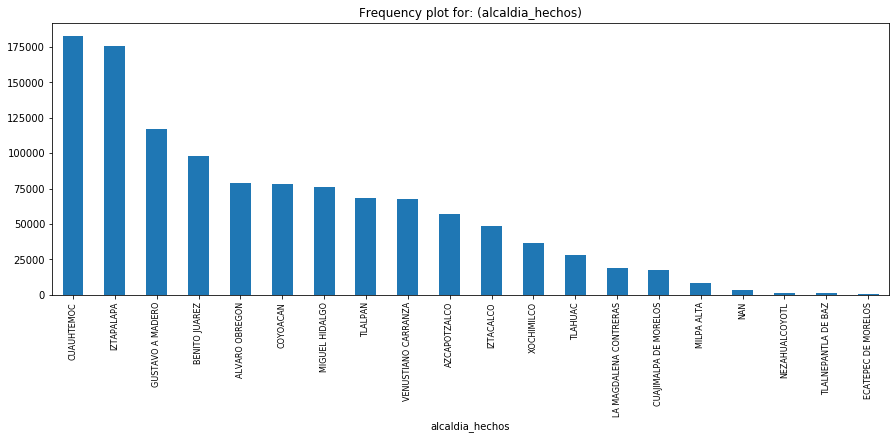

In [50]:
fig, axes = plt.subplots(1, 1, figsize=(15, 5))
grid = plt.GridSpec(2, 2, wspace=0.1, hspace=1.5)

df_cats_01.plot.bar(x='alcaldia_hechos', y='Frequency', rot=0, legend=False, title="Frequency plot for: (alcaldia_hechos)",ax=axes)
axes.tick_params(axis='x', labelsize=8 , rotation=90)

# ¿Existe alguna tendencia estacional en la ocurrencia de delitos (mes, semana, día de la semana, quincenas) en la CDMX? ¿A qué crees que se deba?

In [55]:
# Frequency for Total of crimes

df_cats = df_invest.groupby(['anomes_inicio']).agg(
                        Frequency = ('_id','count'),
)

df_cats = df_cats.reset_index()
df_cats['pp_freq'] = (df_cats['Frequency']/sum(df_cats['Frequency']))*100
df_cats = df_cats.sort_values(['anomes_inicio'],ascending=[True])
df_cats_01 = df_cats.copy()


print(df_cats_01.shape)
df_cats_01

(62, 3)


,anomes_inicio,Frequency,pp_freq
0,2016-01,14778,1.264969
1,2016-02,15515,1.328055
2,2016-03,16270,1.392681
3,2016-04,16992,1.454483
4,2016-05,16857,1.442927
...,...,...,...
57,2020-10,19645,1.681575
58,2020-11,17890,1.531350
59,2020-12,16968,1.452429
60,2021-01,15874,1.358785


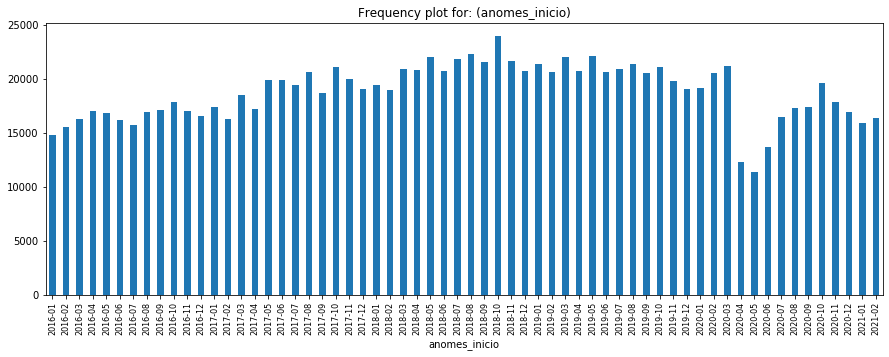

In [56]:
fig, axes = plt.subplots(1, 1, figsize=(15, 5))
grid = plt.GridSpec(2, 2, wspace=0.1, hspace=1.5)

df_cats_01.plot.bar(x='anomes_inicio', y='Frequency', rot=0, legend=False, title="Frequency plot for: (anomes_inicio)",ax=axes)
axes.tick_params(axis='x', labelsize=8 , rotation=90)

In [63]:
# Frequency for Total of crimes

df_input = df_invest[df_invest['anomes_inicio'].isin(['2021-01','2021-02'])==False].copy()

df_cats = df_input.groupby(['mes_inicio2']).agg(
                        Frequency = ('_id','count'),
)

df_cats = df_cats.reset_index()
df_cats['pp_freq'] = (df_cats['Frequency']/sum(df_cats['Frequency']))*100
df_cats = df_cats.sort_values(['mes_inicio2'],ascending=[True])
df_cats_02 = df_cats.copy()


print(df_cats_02.shape)
df_cats_02

(12, 3)


,mes_inicio2,Frequency,pp_freq
0,01,92214,8.117651
1,02,92083,8.106119
2,03,99020,8.716787
3,04,88170,7.761655
4,05,92287,8.124077
5,06,91212,8.029444
6,07,94483,8.317392
7,08,98721,8.690466
8,09,95364,8.394947
9,10,103727,9.131147


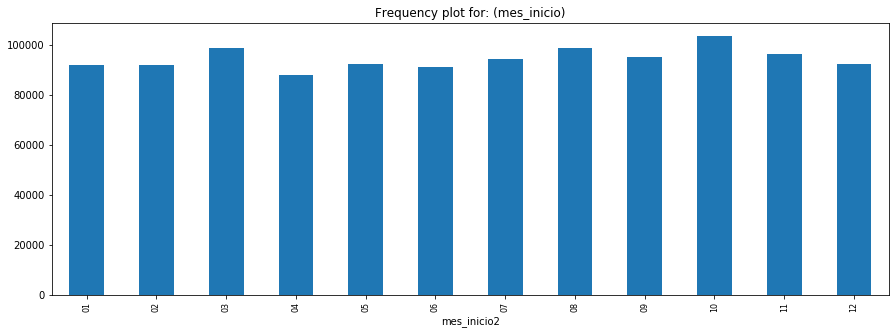

In [64]:
fig, axes = plt.subplots(1, 1, figsize=(15, 5))
grid = plt.GridSpec(2, 2, wspace=0.1, hspace=1.5)

df_cats_02.plot.bar(x='mes_inicio2', y='Frequency', rot=0, legend=False, title="Frequency plot for: (mes_inicio)",ax=axes)
axes.tick_params(axis='x', labelsize=8 , rotation=90)

In [65]:
# Frequency for Total of crimes

df_input = df_invest[df_invest['anomes_inicio'].isin(['2021-01','2021-02'])==False].copy()

df_cats = df_input.groupby(['ao_inicio']).agg(
                        Frequency = ('_id','count'),
)

df_cats = df_cats.reset_index()
df_cats['pp_freq'] = (df_cats['Frequency']/sum(df_cats['Frequency']))*100
df_cats = df_cats.sort_values(['ao_inicio'],ascending=[True])
df_cats_03 = df_cats.copy()


print(df_cats_03.shape)
df_cats_03

(5, 3)


,ao_inicio,Frequency,pp_freq
0,2016,197913,17.422394
1,2017,228323,20.099404
2,2018,255311,22.475173
3,2019,250386,22.041623
4,2020,204036,17.961406


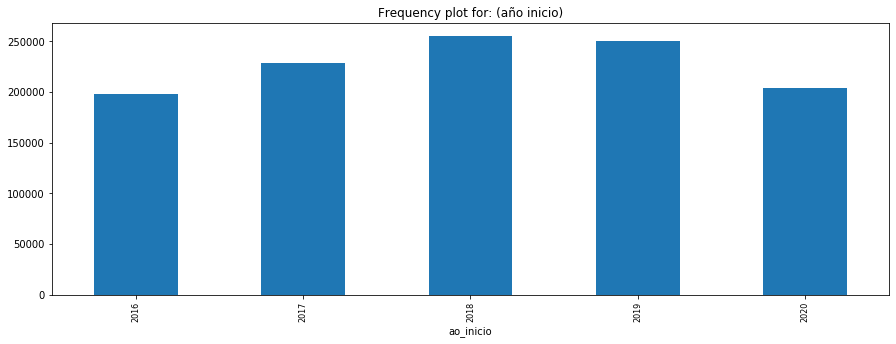

In [66]:
fig, axes = plt.subplots(1, 1, figsize=(15, 5))
grid = plt.GridSpec(2, 2, wspace=0.1, hspace=1.5)

df_cats_03.plot.bar(x='ao_inicio', y='Frequency', rot=0, legend=False, title="Frequency plot for: (año inicio)",ax=axes)
axes.tick_params(axis='x', labelsize=8 , rotation=90)

# ¿Cuáles son los delitos que más caracterizan a cada alcaldía? Es decir, delitos que suceden con mayor frecuencia en una alcaldía y con menor frecuencia en las demás.

In [71]:
# Frequency for Total of crimes and counties

df_cats = df_invest.groupby(['categoria_delito','alcaldia_hechos']).agg(
                        Frequency = ('_id','count'),
)

df_cats = df_cats.reset_index()
df_cats['pp_freq'] = (df_cats['Frequency']/sum(df_cats['Frequency']))*100
df_cats = df_cats.sort_values(['categoria_delito','Frequency'],ascending=[True,False])
df_cats_01 = df_cats.copy()


print(df_cats_01.shape)
df_cats_01

(1402, 4)


,categoria_delito,alcaldia_hechos,Frequency,pp_freq
111,DELITO DE BAJO IMPACTO,CUAUHTEMOC,144972,12.409330
172,DELITO DE BAJO IMPACTO,IZTAPALAPA,127513,10.914873
149,DELITO DE BAJO IMPACTO,GUSTAVO A MADERO,87506,7.490349
55,DELITO DE BAJO IMPACTO,BENITO JUAREZ,81852,7.006377
106,DELITO DE BAJO IMPACTO,COYOACAN,63143,5.404922
...,...,...,...,...
1397,VIOLACIÃN,XOCHITEPEC,1,0.000086
1398,VIOLACIÃN,YAUHQUEMECAN,1,0.000086
1399,VIOLACIÃN,ZACATLAN,1,0.000086
1400,VIOLACIÃN,ZAPOPAN,1,0.000086


In [72]:
#Makes the ID for the sorted frequency

df_cats_01['id_alcaldia'] = df_cats_01.sort_values(['Frequency','pp_freq'],\
                                ascending=[False,False]) \
                                .groupby(['categoria_delito']) \
                                .cumcount() + 1

 

print(df_cats_01['id_alcaldia'].value_counts(dropna=False).reset_index().sort_values(['index'],ascending = False))

     index  id_alcaldia
218    436            1
203    435            1
298    434            1
297    433            1
296    432            1
..     ...          ...
13       5           16
14       4           16
15       3           16
1        2           17
0        1           18

[436 rows x 2 columns]


In [76]:
df_cats_02 = df_cats_01[df_cats_01['id_alcaldia']==1].copy().drop(columns=['id_alcaldia'])
df_cats_02 = df_cats_02.sort_values(['alcaldia_hechos'],ascending=[True])
df_cats_02

,categoria_delito,alcaldia_hechos,Frequency,pp_freq
436,FEMINICIDIO,ALVARO OBREGON,1,0.000086
111,DELITO DE BAJO IMPACTO,CUAUHTEMOC,144972,12.409330
483,HECHO NO DELICTIVO,CUAUHTEMOC,11057,0.946458
959,ROBO A PASAJERO A BORDO DEL METRO CON Y SIN VI...,CUAUHTEMOC,5527,0.473101
935,ROBO A PASAJERO A BORDO DE TAXI CON VIOLENCIA,CUAUHTEMOC,196,0.016777
1185,ROBO DE VEHÃCULO CON Y SIN VIOLENCIA,IZTAPALAPA,12807,1.096255
1112,ROBO A TRANSPORTISTA CON Y SIN VIOLENCIA,IZTAPALAPA,169,0.014466
1058,ROBO A TRANSEUNTE EN VÃA PÃBLICA CON Y SIN V...,IZTAPALAPA,12839,1.098994
999,ROBO A REPARTIDOR CON Y SIN VIOLENCIA,IZTAPALAPA,3798,0.325102
883,ROBO A NEGOCIO CON VIOLENCIA,IZTAPALAPA,3674,0.314487


# Diseña un indicador que mida el nivel de “inseguridad”. Genéralo al nivel de desagregación que te parezca más adecuado (ej. manzana, calle, AGEB, etc.). Analiza los resultados ¿Encontraste algún patrón interesante? ¿Qué decisiones se podrían tomar con el indicador?


In [81]:
df_invest['colonia'] = df_invest['colonia_hechos']
df_invest.loc[df_invest['colonia'].isin(['NAN']),'colonia'] = df_invest['calle_hechos2']
df_invest.loc[df_invest['colonia'].isin(['NAN']),'colonia'] = df_invest['calle_hechos']
              
print(df_invest['colonia'].value_counts(dropna=False).reset_index().sort_values(['colonia'],ascending = False))

                                                   index  colonia
0                                                 CENTRO    38685
1                                               DOCTORES    22763
2                                       DEL VALLE CENTRO    17142
3                                             ROMA NORTE    14182
4                                               NARVARTE    12517
...                                                  ...      ...
8329   16 DE SEPTIEMBRE (HECHOS EN EL ESTADO DE MEXIC...        1
8330                                         MARIA LUISA        1
8331               ANDES (HECHOS EN EL ESTADO DE MEXICO)        1
8332                                 MOTOLINIA Y ALLENDE        1
16840  AV. ESTACION (HECHOS ENNEXTLALPAN EDO. DE MEXI...        1

[16841 rows x 2 columns]


In [89]:
# Frequency for Total of crimes and counties

df_alcaldias_colonias = df_invest.groupby(['alcaldia_hechos','colonia']).agg(
                        Frequency = ('_id','count'),
                        Fecha_ultimo_delito = ('fecha_inicio','max')
)

df_alcaldias_colonias = df_alcaldias_colonias.reset_index()
df_alcaldias_colonias = df_alcaldias_colonias.sort_values(['alcaldia_hechos','Frequency'],ascending=[True,False])
df_alcaldias_colonias = df_alcaldias_colonias.copy()


print(df_alcaldias_colonias.shape)
df_alcaldias_colonias

(20941, 4)


,alcaldia_hechos,colonia,Frequency,Fecha_ultimo_delito
0,ABALA,DOCTOR LAVISTA,1,2016-01-08
1,ACAMBARO,-HECHOS EN EL ESTADO DE GUANAJUATO-,1,2019-04-30
2,ACAMBARO,OFICIO DE COLABORACION,1,2020-08-13
3,ACAMBAY,-NO SCINCE-,1,2020-09-05
4,ACAMBAY,DESCONOCIDO,1,2019-07-30
...,...,...,...,...
20936,ZUMPANGO,PUEBLO NUEVO DE MORELOS,1,2020-09-26
20937,ZUMPANGO,SAN GABRIEL,1,2017-01-27
20938,ZUMPANGO,"UNIDAD CASTALIAS, ZUMPANGO, ESTADO DE MEXICO",1,2021-02-02
20939,ZUMPANGO,"VILLAS DE AZUCENAS MANZANA CINCO, LOTE TRES, E...",1,2019-04-22


In [95]:
df_max_alcaldias = df_alcaldias_colonias.groupby(['alcaldia_hechos']).agg(
                        nro_delitos = ('Frequency','sum'),
                        max_delitos = ('Frequency','max'),
)

df_max_alcaldias = df_max_alcaldias.reset_index()

df_max_alcaldias

,alcaldia_hechos,nro_delitos,max_delitos
0,ABALA,1,1
1,ACAMBARO,2,1
2,ACAMBAY,4,1
3,ACAPULCO DE JUAREZ,59,9
4,ACATLAN,3,1
...,...,...,...
537,ZINACANTEPEC,8,1
538,ZINAPECUARO,2,1
539,ZITACUARO,4,1
540,ZITLALTEPEC DE TRINIDAD SANCHEZ SANTOS,1,1


In [96]:
df_alcaldias_colonias_01 = pd.merge(df_alcaldias_colonias,
                                df_max_alcaldias,
                                on =['alcaldia_hechos'],
                                how = 'left').copy()

print(df_alcaldias_colonias.shape)
print(df_alcaldias_colonias_01.shape)

df_alcaldias_colonias_01

(20941, 4)
(20941, 6)


,alcaldia_hechos,colonia,Frequency,Fecha_ultimo_delito,nro_delitos,max_delitos
0,ABALA,DOCTOR LAVISTA,1,2016-01-08,1,1
1,ACAMBARO,-HECHOS EN EL ESTADO DE GUANAJUATO-,1,2019-04-30,2,1
2,ACAMBARO,OFICIO DE COLABORACION,1,2020-08-13,2,1
3,ACAMBAY,-NO SCINCE-,1,2020-09-05,4,1
4,ACAMBAY,DESCONOCIDO,1,2019-07-30,4,1
...,...,...,...,...,...,...
20936,ZUMPANGO,PUEBLO NUEVO DE MORELOS,1,2020-09-26,46,6
20937,ZUMPANGO,SAN GABRIEL,1,2017-01-27,46,6
20938,ZUMPANGO,"UNIDAD CASTALIAS, ZUMPANGO, ESTADO DE MEXICO",1,2021-02-02,46,6
20939,ZUMPANGO,"VILLAS DE AZUCENAS MANZANA CINCO, LOTE TRES, E...",1,2019-04-22,46,6


In [97]:
df_alcaldias_colonias_01['idx_inseguridad'] = round((df_alcaldias_colonias_01['Frequency'] / df_alcaldias_colonias_01['max_delitos'])*100)

df_alcaldias_colonias_01

,alcaldia_hechos,colonia,Frequency,Fecha_ultimo_delito,nro_delitos,max_delitos,idx_inseguridad
0,ABALA,DOCTOR LAVISTA,1,2016-01-08,1,1,100.0
1,ACAMBARO,-HECHOS EN EL ESTADO DE GUANAJUATO-,1,2019-04-30,2,1,100.0
2,ACAMBARO,OFICIO DE COLABORACION,1,2020-08-13,2,1,100.0
3,ACAMBAY,-NO SCINCE-,1,2020-09-05,4,1,100.0
4,ACAMBAY,DESCONOCIDO,1,2019-07-30,4,1,100.0
...,...,...,...,...,...,...,...
20936,ZUMPANGO,PUEBLO NUEVO DE MORELOS,1,2020-09-26,46,6,17.0
20937,ZUMPANGO,SAN GABRIEL,1,2017-01-27,46,6,17.0
20938,ZUMPANGO,"UNIDAD CASTALIAS, ZUMPANGO, ESTADO DE MEXICO",1,2021-02-02,46,6,17.0
20939,ZUMPANGO,"VILLAS DE AZUCENAS MANZANA CINCO, LOTE TRES, E...",1,2019-04-22,46,6,17.0


In [98]:
#Makes the ID for the sorted frequency

df_alcaldias_colonias_01['id_colonia'] = df_alcaldias_colonias_01.sort_values(['idx_inseguridad','Frequency','Fecha_ultimo_delito'],\
                                ascending=[False,False,False]) \
                                .groupby(['alcaldia_hechos']) \
                                .cumcount() + 1

 

print(df_alcaldias_colonias_01['id_colonia'].value_counts(dropna=False).reset_index().sort_values(['index'],ascending = False))

      index  id_colonia
2110   2475           1
2016   2474           1
2390   2473           1
2088   2472           1
2430   2471           1
...     ...         ...
4         5         154
3         4         180
2         3         214
1         2         310
0         1         542

[2475 rows x 2 columns]


In [101]:
#Shows the most relevant colonies by county
df_alcaldias_colonias_02 = df_alcaldias_colonias_01[df_alcaldias_colonias_01['id_colonia']==1].copy().drop(columns=['id_colonia'])
df_alcaldias_colonias_02 = df_alcaldias_colonias_02.sort_values(['nro_delitos','alcaldia_hechos'],ascending=[False,True])
df_alcaldias_colonias_02.head(20)

,alcaldia_hechos,colonia,Frequency,Fecha_ultimo_delito,nro_delitos,max_delitos,idx_inseguridad
4068,CUAUHTEMOC,CENTRO,38681,2021-02-28,182733,38681,100.0
9009,IZTAPALAPA,CENTRAL DE ABASTO,7850,2021-02-28,175731,7850,100.0
6841,GUSTAVO A MADERO,LINDAVISTA,5119,2021-02-28,117084,5119,100.0
1917,BENITO JUAREZ,DEL VALLE CENTRO,17142,2021-02-28,97738,17142,100.0
126,ALVARO OBREGON,JARDINES DEL PEDREGAL,3553,2021-02-28,78940,3553,100.0
3086,COYOACAN,PEDREGAL DE SANTO DOMINGO,6817,2021-02-28,77873,6817,100.0
12089,MIGUEL HIDALGO,POLANCO,9874,2021-02-27,76285,9874,100.0
17967,TLALPAN,SAN ANDRÃS TOTOLTEPEC,4608,2021-02-28,68317,4608,100.0
19348,VENUSTIANO CARRANZA,JARDÃN BALBUENA,6293,2021-02-28,67368,6293,100.0
1399,AZCAPOTZALCO,EL ROSARIO,4040,2021-02-28,56768,4040,100.0
